In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

class LassoRegression(nn.Module):
    def __init__(self, input_dim):
        super(LassoRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

data = pd.read_csv("mainmain.csv")


data.drop(columns=['title', 'release_date', 'original_language'], inplace=True) 
data.fillna(0, inplace=True)  

features = data.drop("vote_average", axis="columns").values.astype(np.float32)
target = data["vote_average"].values.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_tensor = torch.tensor(x_train_scaled)
y_train_tensor = torch.tensor(y_train).view(-1, 1)
x_test_tensor = torch.tensor(x_test_scaled)

model = LassoRegression(input_dim=x_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
l1_lambda = 0.01  
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, 1)
    loss += l1_lambda * l1_regularization
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)
y_pred = y_pred_tensor.numpy()


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


input_values = []
for feature in data.columns[:-1]:
    value = float(input(f"Enter {feature}: "))
    input_values.append(value)

input_tensor = torch.tensor(scaler.transform([input_values]), dtype=torch.float32)
with torch.no_grad():
    prediction = model(input_tensor).item()

print("Predicted Imdb Rating:", round(prediction, 0))


Mean Absolute Error: 0.7769289
Mean Squared Error: 0.8851346
R-squared Score: 0.9100356551418041


In [3]:
import pandas as pd

data = pd.read_csv("movies1111.csv", encoding='latin1')


director_movie_counts = data['Director'].value_counts()

directors_with_multiple_movies = director_movie_counts[director_movie_counts > 1].index

data_multiple_movies = data[data['Director'].isin(directors_with_multiple_movies)]

director_avg_imdb = data_multiple_movies.groupby('Director')['vote_average'].mean().reset_index()

director_info = pd.merge(director_avg_imdb, director_movie_counts.rename('Number of Movies'), left_on='Director', right_index=True)

director_info_sorted = director_info.sort_values(by='vote_average', ascending=False)

print("Directors with multiple movies sorted by average IMDb rating (descending order):")
print(director_info_sorted)


Directors with multiple movies sorted by average IMDb rating (descending order):
               Director  vote_average  Number of Movies
223         Pete Docter      7.850000                 2
56    Christopher Nolan      7.838889                18
271      S.S. Rajamouli      7.833333                 6
240     Rajkumar Hirani      7.720000                 5
238   Quentin Tarantino      7.720000                 5
..                  ...           ...               ...
258    Robert Rodriguez      4.975000                 4
40         Brian Levant      4.966667                 3
262        Roger Kumble      4.950000                 2
14   Andrzej Bartkowiak      4.733333                 3
10       Andrew Bergman      4.500000                 2

[322 rows x 3 columns]


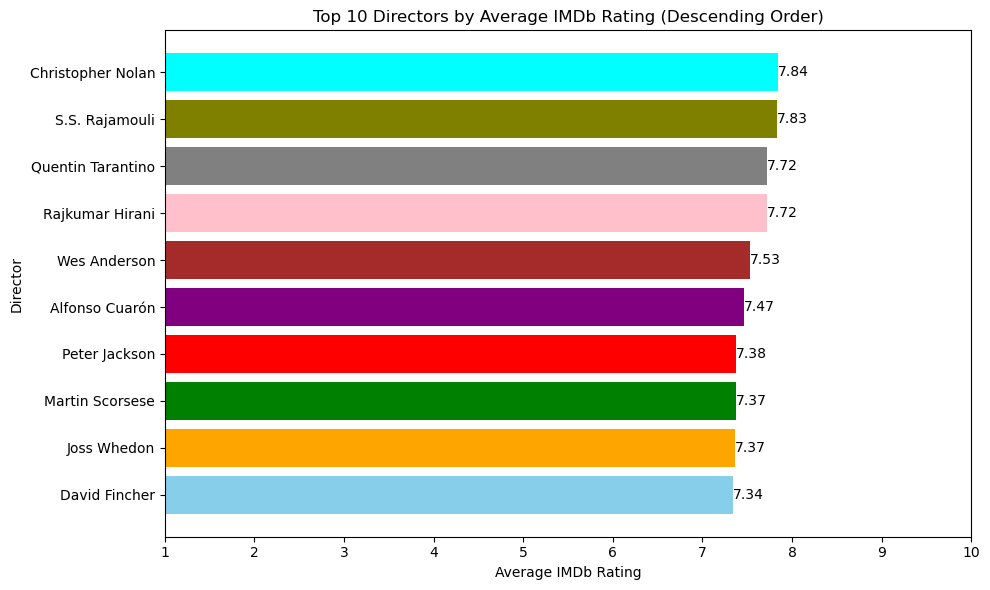

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("movies1111.csv", encoding='latin1')

director_movie_counts = data['Director'].value_counts()

directors_with_multiple_movies = director_movie_counts[director_movie_counts > 2].index

data_multiple_movies = data[data['Director'].isin(directors_with_multiple_movies)]

director_avg_imdb = data_multiple_movies.groupby('Director')['vote_average'].mean().reset_index()

director_info = pd.merge(director_avg_imdb, director_movie_counts.rename('Number of Movies'), left_on='Director', right_index=True)

director_info_sorted = director_info.sort_values(by='vote_average', ascending=True)

top_10_directors = director_info_sorted.tail(10)


colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_directors['Director'], top_10_directors['vote_average'], color=colors)
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.title('Top 10 Directors by Average IMDb Rating (Descending Order)')
plt.xticks([i for i in range(1, 11)])  
plt.xlim(1, 10)

for bar, avg_rating in zip(bars, top_10_directors['vote_average']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(avg_rating, 2),
             ha='left', va='center')

plt.tight_layout()
plt.show()


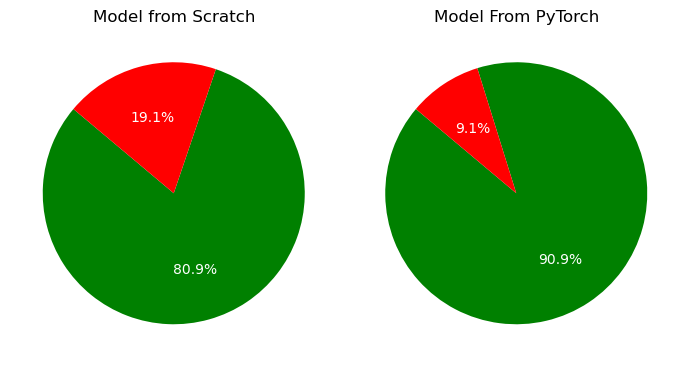

In [6]:
import matplotlib.pyplot as plt

your_model_r_squared = 0.9091563148218672
scratch_model_r_squared = 0.8090575353785314

plt.figure(figsize=(7, 5))


plt.subplot(1, 2, 1)
patches, texts, autotexts = plt.pie([scratch_model_r_squared, 1 - scratch_model_r_squared], labels=['', ''],  colors=['green', 'red'], autopct='%1.1f%%', startangle=140)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Model from Scratch')

plt.subplot(1, 2, 2)
patches, texts, autotexts = plt.pie([your_model_r_squared, 1 - your_model_r_squared], labels=['', ''],  colors=['green', 'red'], autopct='%1.1f%%', startangle=140)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Model From PyTorch')

plt.tight_layout()
plt.show()


Lasso Regression:
Mean Absolute Error: 0.264
Mean Squared Error: 0.228
R-squared Score: 0.977


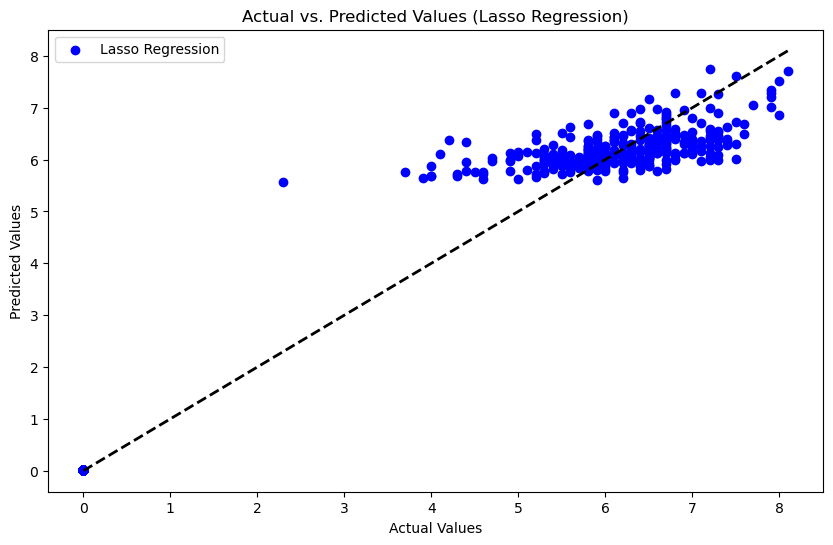

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge

data = pd.read_csv("mainmain.csv")

data.fillna(0, inplace=True)  # Replace NaN with 0


data['budget_to_revenue_ratio'] = data['budget'] / data['revenue']
data['runtime_sqrt'] = np.sqrt(data['runtime'])
data['vote_count_sqrt'] = np.sqrt(data['vote_count'])


data = pd.get_dummies(data, columns=['original_language'])


features = data.drop(["vote_average", "release_date", "title"], axis="columns").values.astype(np.float32)
target = data["vote_average"].values.astype(np.float32)


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)


lasso = Lasso(alpha=0.01)  
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)


def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

mae_lasso, mse_lasso, r2_lasso = evaluate(y_test, y_pred_lasso)

print("Lasso Regression:")
print("Mean Absolute Error:", round(mae_lasso, 3))
print("Mean Squared Error:", round(mse_lasso, 3))
print("R-squared Score:", round(r2_lasso, 3))


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, c='blue', marker='o', label='Lasso Regression')
plt.title('Actual vs. Predicted Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend(loc='upper left')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', lw=2, linestyle='--')
plt.show()
